### Import

In [27]:
import os
import cv2
import numpy as np
import sklearn
from skimage.feature import hog
from skimage.feature import local_binary_pattern

## Load Datasets and extract features
Using HOG feature extraction

In [28]:
jaffe_train_path = "jaffe//train"
jaffe_test_path = "jaffe//test"
ck_train_path = "ck//train"
ck_test_path = "ck//test"

jaffe_emotion_map = {
    'Angry': 0,
    'Fear': 1,
    'Happy': 2,
    'Sad': 3,
    'Surprise': 4,
    'Neutral': 5,
}

ck_emotion_map = {
    'anger': 0,
    'fear': 1,
    'happy': 2,
    'sadness': 3,
    'surprise': 4,
    'neutral': 5,
}

def load_the_images_of_the_files(file_path, emotion_map):
    features = []
    labels = []

    for emotion, label in emotion_map.items():
        emotions = os.path.join(file_path, emotion)

        imageFiles = [fileName for fileName in os.listdir(emotions) if fileName.endswith(('.jpg', '.png', '.tiff'))]

        for imageFile in imageFiles:
            image_path = os.path.join(emotions, imageFile)

            image = cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (300, 300))

            hog_feature = hog(
                image,
                orientations=9,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                visualize=False,
            )

            features.append(hog_feature)

            labels.append(label)

    return np.array(features), np.array(labels)

jaffe_X_train, jaffe_Y_train = load_the_images_of_the_files(jaffe_train_path, jaffe_emotion_map)
ck_X_train, ck_Y_train = load_the_images_of_the_files(ck_train_path, ck_emotion_map)
dataset_x_train = np.concatenate((jaffe_X_train, ck_X_train))
dataset_y_train = np.concatenate((jaffe_Y_train, ck_Y_train))

jaffe_X_test, jaffe_Y_test = load_the_images_of_the_files(jaffe_test_path, jaffe_emotion_map)
ck_X_test, ck_Y_test = load_the_images_of_the_files(ck_test_path, ck_emotion_map)
dataset_x_test = np.concatenate((jaffe_X_test, ck_X_test))
dataset_y_test = np.concatenate((jaffe_Y_test, ck_Y_test))

## Load Datasets and extract features
Using LBP feature extraction

In [19]:
jaffe_train_path = "jaffe//train"
jaffe_test_path = "jaffe//test"
ck_train_path = "ck//train"
ck_test_path = "ck//test"

jaffe_emotion_map = {
    'Angry': 0,
    'Fear': 1,
    'Happy': 2,
    'Sad': 3,
    'Surprise': 4,
    'Neutral': 5,
}

ck_emotion_map = {
    'anger': 0,
    'fear': 1,
    'happy': 2,
    'sadness': 3,
    'surprise': 4,
    'neutral': 5,
}

def load_the_images_of_the_files(file_path, emotion_map):
    features = []
    labels = []

    for emotion, label in emotion_map.items():
        emotions = os.path.join(file_path, emotion)

        imageFiles = [fileName for fileName in os.listdir(emotions) if fileName.endswith(('.jpg', '.png', '.tiff'))]

        for imageFile in imageFiles:
            image_path = os.path.join(emotions, imageFile)

            image = cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (300, 300))

            # Parameters for LBP
            radius = 3  # Radius of the circle
            n_points = 8 * radius  # Number of points around the circle
            method = 'uniform'  # Uniform LBP

            lbp = local_binary_pattern(image, n_points, radius, method)

            n_bins = int(lbp.max() + 1)
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

            features.append(lbp_hist)

            labels.append(label)

    return np.array(features), np.array(labels)

jaffe_X_train, jaffe_Y_train = load_the_images_of_the_files(jaffe_train_path, jaffe_emotion_map)
ck_X_train, ck_Y_train = load_the_images_of_the_files(ck_train_path, ck_emotion_map)
dataset_x_train = np.concatenate((jaffe_X_train, ck_X_train))
dataset_y_train = np.concatenate((jaffe_Y_train, ck_Y_train))

jaffe_X_test, jaffe_Y_test = load_the_images_of_the_files(jaffe_test_path, jaffe_emotion_map)
ck_X_test, ck_Y_test = load_the_images_of_the_files(ck_test_path, ck_emotion_map)
dataset_x_test = np.concatenate((jaffe_X_test, ck_X_test))
dataset_y_test = np.concatenate((jaffe_Y_test, ck_Y_test))

## KNN Train/Test

In [29]:
# Train Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(dataset_x_train, dataset_y_train)

# Test Model

from sklearn.metrics import classification_report, accuracy_score

dataset_y_pred = knn.predict(dataset_x_test)

print(classification_report(dataset_y_test, dataset_y_pred, target_names=jaffe_emotion_map.keys()))
print(f"{accuracy_score(dataset_y_test, dataset_y_pred)* 100:.2f}% ")

              precision    recall  f1-score   support

       Angry       0.40      0.37      0.38        27
        Fear       0.60      0.18      0.27        17
       Happy       0.90      0.69      0.78        39
         Sad       0.31      0.31      0.31        26
    Surprise       0.77      0.55      0.64        44
     Neutral       0.41      0.73      0.52        45

    accuracy                           0.53       198
   macro avg       0.56      0.47      0.49       198
weighted avg       0.59      0.53      0.53       198

53.03% 


# SVM Train/Test

In [31]:
# Train Model

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(dataset_x_train, dataset_y_train)

# Test Model

from sklearn.metrics import classification_report, accuracy_score

dataset_y_pred = svm.predict(dataset_x_test)

print(classification_report(dataset_y_test, dataset_y_pred, target_names=jaffe_emotion_map.keys()))
print(f"{accuracy_score(dataset_y_test, dataset_y_pred)* 100:.2f}% ")

              precision    recall  f1-score   support

       Angry       0.60      0.33      0.43        27
        Fear       0.25      0.18      0.21        17
       Happy       0.89      0.85      0.87        39
         Sad       0.47      0.54      0.50        26
    Surprise       0.76      0.73      0.74        44
     Neutral       0.45      0.62      0.52        45

    accuracy                           0.60       198
   macro avg       0.57      0.54      0.55       198
weighted avg       0.61      0.60      0.60       198

60.10% 


# Create a Confusion Matrix

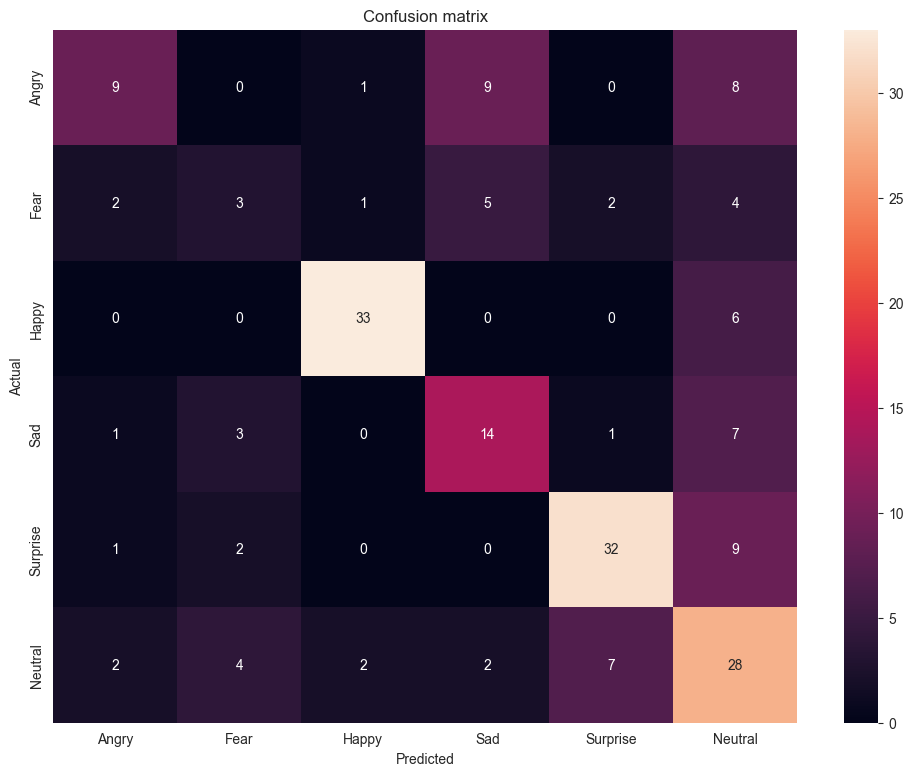

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(dataset_y_test, dataset_y_pred)

plt.figure(figsize = (12, 9))
sns.heatmap(conf_mat, annot=True, xticklabels=jaffe_emotion_map.keys(), yticklabels=jaffe_emotion_map.keys())
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show figures with classification

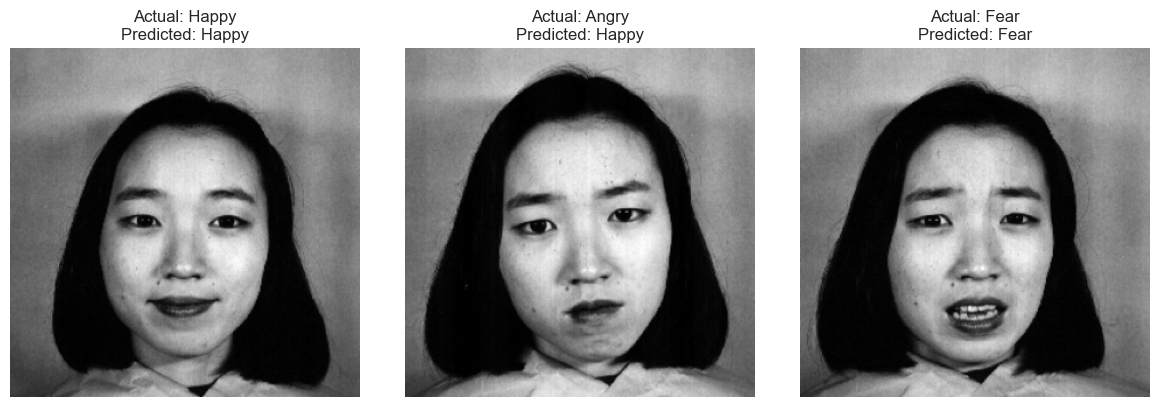

In [33]:
import random
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import os

# Define the emotion map
jaffe_emotion_map = {
    'Angry': 0,
    'Fear': 1,
    'Happy': 2,
    'Sad': 3,
    'Surprise': 4,
    'Neutral': 5,
}

# Randomly pick 3 emotions from the list
random_emotions = random.sample(list(jaffe_emotion_map.keys()), 3)

# Create a plot to display the images
fig, axes = plt.subplots(1, len(random_emotions), figsize=(12, 4))

# Loop through the selected emotions
for i, e in enumerate(random_emotions):
    emotions = os.path.join(jaffe_test_path, e)

    # Load a random image from the selected emotion folder
    random_image = [fileName for fileName in os.listdir(emotions) if fileName.endswith(('.jpg', '.png', '.tiff'))][0]
    image_path = os.path.join(emotions, random_image)

    # Read and resize the image
    image = cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (300, 300))

    # Extract HOG features
    hog_feature = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, channel_axis=None)

    # Reshape the HOG feature array to a 2D array (1 sample, multiple features)
    hog_feature = hog_feature.reshape(1, -1)

    # Predict using the trained SVM model
    y = svm.predict(hog_feature)

    # Get the predicted label using the index from the prediction array
    predicted_label = list(jaffe_emotion_map.keys())[y[0]]  # y[0][0] extracts the first value from the prediction array

    # Display the image with actual and predicted labels
    ax = axes[i]  # Get the corresponding axis for the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Actual: {e}\nPredicted: {predicted_label}")
    ax.axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# Visualising the HOG

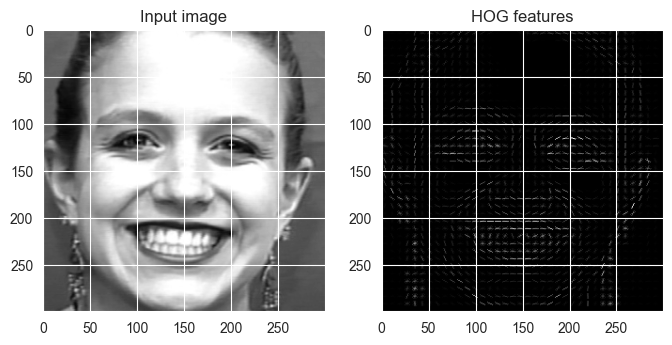

In [34]:
from skimage import color
from skimage.feature import hog
from skimage import data, exposure, io
import matplotlib.pyplot as plt

image_path = r"C:\Users\Iain Simpson\Desktop\AI\Assignments2\ck\train\happy\45.jpg"

image = cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (300, 300))

# Extract HOG features
features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input image')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG features')
plt.show()